In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('Social_Network_Ads.csv')

df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [2]:
df.shape

(400, 5)

In [3]:
df.info()  # Finding out basic info, count of entries, null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
extracted_columns = df.iloc[:, [1, 4]]     # Saving certain columns to re-add later after standardization

extracted_columns.head(5)

,Gender,Purchased
0,Male,0
1,Male,0
2,Female,0
3,Female,0
4,Male,0


In [6]:
df_leftover = df.drop(df.columns[[1, 4]], axis = 1)    # Removing 'Gender' and 'Purchase' columns to add back in later

pd.DataFrame(df_leftover)

df_leftover.head(5)

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000


In [7]:
from sklearn.preprocessing import StandardScaler         # Standardizing the independent discrete variables

sc = StandardScaler()

df_leftover_standardized = sc.fit_transform(df_leftover)

df_leftover_standardized = pd.DataFrame(df_leftover_standardized, columns = df_leftover.columns)

df_leftover_standardized.head(5)

,User ID,Age,EstimatedSalary
0,-0.936579,-1.781797,-1.490046
1,1.668387,-0.253587,-1.460681
2,-0.320877,-1.113206,-0.785290
3,-1.233692,-1.017692,-0.374182
4,1.571389,-1.781797,0.183751


In [8]:
df_leftover_standardized.info()  # Sanity checking the data - numeric data now continuous (floats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [9]:
merged_df = pd.merge(df_leftover_standardized, extracted_columns, left_index = True, right_index = True) 

merged_df.head(10)             # Merging 'Gender' and 'Purchased' columns back into the standardized dataframe

,User ID,Age,EstimatedSalary,Gender,Purchased
0,-0.936579,-1.781797,-1.490046,Male,0
1,1.668387,-0.253587,-1.460681,Male,0
2,-0.320877,-1.113206,-0.785290,Female,0
3,-1.233692,-1.017692,-0.374182,Female,0
4,1.571389,-1.781797,0.183751,Male,0
5,0.520245,-1.017692,-0.344817,Male,0
6,-1.306378,-1.017692,0.418669,Female,0
7,0.045959,-0.540127,2.356750,Female,1
8,-1.271013,-1.208719,-1.078938,Male,0
9,0.499817,-0.253587,-0.139263,Female,0


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Gender           400 non-null    object 
 4   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
#import numpy as np                     # Making Array for 'Gender' feature for one-hot encoding
#from numpy import asarray

#gender = asarray(merged_df['Gender'])

#gender.size

In [12]:
#gender = gender.reshape(400, 1) # Reshaping array to 2D to be compatible with one-hot encoding

#gender.size

In [13]:
gender_encoded = pd.get_dummies(merged_df['Gender'], prefix = '', prefix_sep = '') # one hot encoding on 'Gender' column

In [14]:
merged_df = pd.concat([merged_df.iloc[:, :-1], gender_encoded, merged_df.iloc[:, -1]], axis = 1) 

merged_df = pd.DataFrame(merged_df)

merged_df.head(10)       # Merged the encoded 'Gender' data back into main dataframe as two columns 'Male' and 'Female'

,User ID,Age,EstimatedSalary,Gender,Female,Male,Purchased
0,-0.936579,-1.781797,-1.490046,Male,0,1,0
1,1.668387,-0.253587,-1.460681,Male,0,1,0
2,-0.320877,-1.113206,-0.785290,Female,1,0,0
3,-1.233692,-1.017692,-0.374182,Female,1,0,0
4,1.571389,-1.781797,0.183751,Male,0,1,0
5,0.520245,-1.017692,-0.344817,Male,0,1,0
6,-1.306378,-1.017692,0.418669,Female,1,0,0
7,0.045959,-0.540127,2.356750,Female,1,0,1
8,-1.271013,-1.208719,-1.078938,Male,0,1,0
9,0.499817,-0.253587,-0.139263,Female,1,0,0


In [15]:
merged_df = merged_df.drop('Gender', axis = 1)

merged_df.head(10)          # Removing unprocessed 'Gender' column

,User ID,Age,EstimatedSalary,Female,Male,Purchased
0,-0.936579,-1.781797,-1.490046,0,1,0
1,1.668387,-0.253587,-1.460681,0,1,0
2,-0.320877,-1.113206,-0.785290,1,0,0
3,-1.233692,-1.017692,-0.374182,1,0,0
4,1.571389,-1.781797,0.183751,0,1,0
5,0.520245,-1.017692,-0.344817,0,1,0
6,-1.306378,-1.017692,0.418669,1,0,0
7,0.045959,-0.540127,2.356750,1,0,1
8,-1.271013,-1.208719,-1.078938,0,1,0
9,0.499817,-0.253587,-0.139263,1,0,0


In [16]:
#from sklearn.preprocessing import OneHotEncoder # Encoding the array 'Gender' to replace the current gender column in dataframe

#encoder = OneHotEncoder(sparse = False)

#encoded_gender = encoder.fit_transform(gender)

In [17]:
#encoded_gender = encoded_gender.flatten()

#encoded_gender.size

In [18]:
#encoded_gender = pd.DataFrame(encoded_gender, columns = ['Gender Encoded'])

In [19]:
#merged_df = pd.concat([merged_df.iloc[:, :-1], encoded_gender, merged_df.iloc[:, -1]], axis = 1)


#merged_df = pd.DataFrame(merged_df)

#merged_df.head(25)

In [20]:
#merged_df = merged_df.drop('Gender', axis = 1)

#print(merged_df)

In [21]:
#merged_df = pd.DataFrame(merged_df)

#merged_df.head(10)

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    float64
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Female           400 non-null    uint8  
 4   Male             400 non-null    uint8  
 5   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 13.4 KB


In [23]:
x = merged_df.iloc[:, :-1].values    # Preparing data to be split into training and testing, y is target variable
y = merged_df.iloc[:, -1].values

In [24]:
from sklearn.model_selection import train_test_split        # Splitting data into training and testing sets at 80/20 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [25]:
from sklearn.tree import DecisionTreeClassifier       # Performing decision tree classification with a max depth of 2



classifier = DecisionTreeClassifier(max_depth = 2, random_state = 0)

classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [26]:
y_pred = classifier.predict(x_test) # Making predictions with the classification model

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        53
           1       0.82      1.00      0.90        27

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



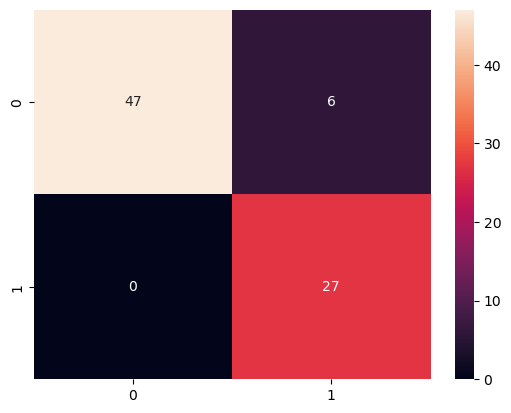

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)        # Generating report and results of model performance

sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [28]:
from sklearn import metrics      # Calculating accuracy score for classification
import warnings
warnings.filterwarnings('ignore')

accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.925


[Text(0.5, 0.8333333333333334, 'X[1] <= 0.463\ngini = 0.462\nsamples = 320\nvalue = [204, 116]'),
 Text(0.25, 0.5, 'X[2] <= 0.58\ngini = 0.287\nsamples = 230\nvalue = [190, 40]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.08\nsamples = 191\nvalue = [183, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 39\nvalue = [7, 32]'),
 Text(0.75, 0.5, 'X[2] <= -0.917\ngini = 0.263\nsamples = 90\nvalue = [14, 76]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.331\nsamples = 62\nvalue = [13, 49]')]

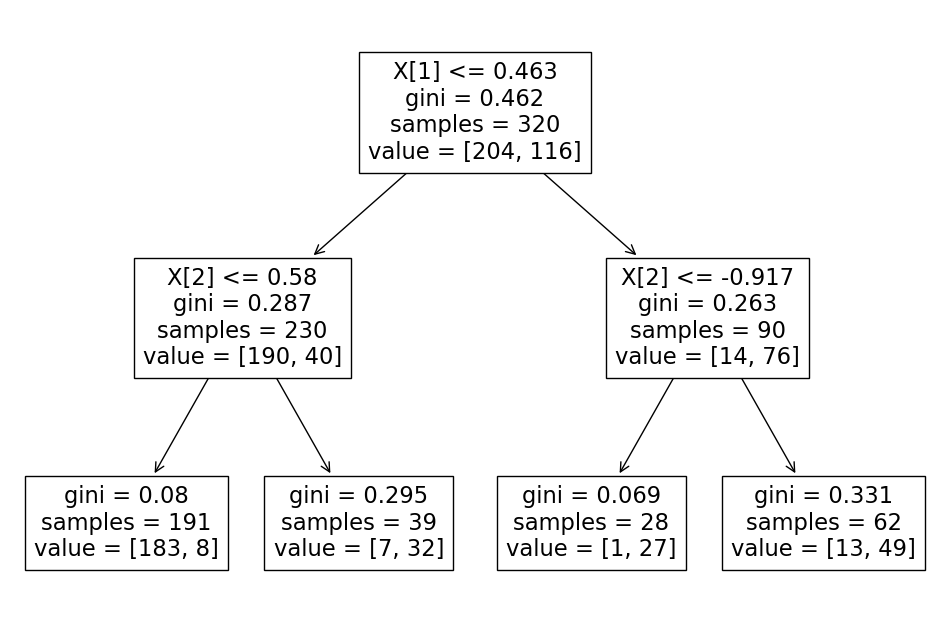

In [29]:
import matplotlib.pyplot as plt       # Plotting tree displaying structure of training model

plt.figure(figsize = (12, 8))

from sklearn import tree

tree.plot_tree(classifier.fit(x_train, y_train))

In [30]:
#from matplotlib.colors import ListedColormap

#x_set, y_set = x_test, y_test

#x1, y1 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
#                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

#plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
 #                                     alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#plt.xlim(x1.min(), x1.max())
#plt.ylim(x2.min(), x2.max())

#for i, j in enumerate(np.unique(y_set)):
#    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
               # c = ListedColormap(('red', 'green'))(i), label = j)
    
#plt.title('Decision Tree Classification (test_set)')
